# Problem Set 4 - Kaylin Kleckner

I used the API Xeno-canto (https://xeno-canto.org/explore/api), which is used to share wildlife sounds from around the world. I pulled data of bird song recordings in Italy and mapped where these recordings took place.


## API

First, I used the `requests` module to pull in data for the recordings in Italy.

In [1]:
import requests #load module

response = requests.get("https://www.xeno-canto.org/api/2/recordings?query=cnt:italy") #url species recordings for Italy using "cnt:italy"

#The recording information was formatted in a list of dictionaries, so to untangle this formatting I pulled only recording info

recordings = response.json()["recordings"] 

print(recordings[0]) #an example of one entry, as a single dictionary (indicated by curly brackets)

{'id': '652482', 'gen': 'Colinus', 'sp': 'virginianus', 'ssp': '', 'group': 'birds', 'en': 'Northern Bobwhite', 'rec': 'Francesco Sottile', 'cnt': 'Italy', 'loc': 'Lonate Pozzolo, Provincia di Varese, Lombardia', 'lat': '45.5663', 'lng': '8.7347', 'alt': '190', 'type': 'song', 'sex': 'male', 'stage': 'adult', 'method': 'field recording', 'url': '//xeno-canto.org/652482', 'file': 'https://xeno-canto.org/652482/download', 'file-name': 'XC652482-Colino della Virginia_disputa canora_0516_1027.mp3', 'sono': {'small': '//xeno-canto.org/sounds/uploaded/ITHRUQEQCF/ffts/XC652482-small.png', 'med': '//xeno-canto.org/sounds/uploaded/ITHRUQEQCF/ffts/XC652482-med.png', 'large': '//xeno-canto.org/sounds/uploaded/ITHRUQEQCF/ffts/XC652482-large.png', 'full': '//xeno-canto.org/sounds/uploaded/ITHRUQEQCF/ffts/XC652482-full.png'}, 'osci': {'small': '//xeno-canto.org/sounds/uploaded/ITHRUQEQCF/wave/XC652482-small.png', 'med': '//xeno-canto.org/sounds/uploaded/ITHRUQEQCF/wave/XC652482-med.png', 'large': '/

### Latitude:

I extracted the latitude and longitude recorded for all 499 entries. I saved each as seperate csv files using the `csv` module.

In [2]:
LAT = [] #create empty list


for recording in recordings: #loop through each recording
    
    try:
        LAT.append(float(recording["lat"])) #add latitude from each recording to the list as a float
    
    except:
        continue #have to use try and except to avoid float argument error
    
    
print(LAT) #list of all latitude values


[45.5663, 45.5651, 45.5668, 45.5647, 39.8335, 46.0312, 45.68, 45.7894, 46.4155, 45.693, 46.0922, 45.9106, 42.7989, 42.7717, 42.908, 45.477, 42.7717, 42.7774, 46.646, 46.087, 46.087, 46.7294, 45.573, 43.049, 42.4019, 42.4019, 44.124, 39.4014, 43.6632, 44.1391, 39.8625, 45.5709, 45.368, 40.5514, 45.368, 42.779, 42.779, 37.6984, 46.009, 42.78, 45.6385, 42.4019, 42.827, 42.7759, 44.9716, 39.3501, 45.731, 45.4504, 43.7823, 45.1797, 43.6915, 43.7869, 44.9007, 42.9037, 44.419, 44.4241, 45.4859, 44.7192, 42.5559, 42.8989, 45.5564, 43.8388, 42.7871, 45.4708, 42.78, 42.806, 44.6347, 45.9977, 42.7856, 45.4396, 43.6839, 42.679, 42.7681, 42.7681, 44.9031, 44.6433, 42.6828, 42.6828, 42.6828, 42.679, 42.7681, 44.7968, 43.8287, 45.5959, 45.6027, 45.6016, 44.6395, 44.6433, 44.9045, 45.6582, 42.6915, 44.7968, 44.6433, 45.6595, 45.6582, 45.6518, 45.4539, 45.4653, 45.6581, 44.9593, 45.6577, 45.3547, 44.3137, 42.4862, 42.9037, 45.4913, 42.4862, 45.4911, 45.4425, 45.8015, 45.5927, 42.8399, 42.8399, 42.8399,

In [3]:
import csv #import csv module

outfile1= open('lat.csv', 'w')#create lat.csv file and indicate writing file by 'w'
out = csv.writer(outfile1)

out.writerows("T") #name header row

out.writerows(map(lambda x: [x], LAT)) #write each value in the LAT list as a row in the csv file

outfile1.close() #close file

### Longitude:

In [4]:
LNG = [] #create empty list


for recording in recordings: #loop through each recording
    
    try:
        LNG.append(float(recording["lng"])) #add longitude from each recording to the list as a float
    
    except:
        continue #avoid float argument error
    
    
print(LNG) #list of all longitude values

[8.7347, 8.7355, 8.7344, 8.7389, 16.3149, 11.0284, 11.016, 10.4402, 10.7518, 11.108, 10.9658, 10.4021, 13.5721, 13.1516, 13.2779, 7.2496, 13.1516, 13.1534, 10.6102, 10.9666, 10.9666, 10.9106, 9.9071, 9.8221, 13.572, 13.572, 10.7948, 16.7102, 13.2532, 11.2547, 16.0576, 9.7622, 10.2179, 17.6777, 10.2179, 13.5782, 13.5782, 15.0248, 11.0307, 13.7224, 11.1543, 13.572, 13.7118, 11.132, 10.5972, 16.4843, 11.1724, 11.9559, 12.7231, 7.0816, 11.8101, 7.6304, 11.1994, 13.9077, 11.4687, 11.4743, 12.5533, 12.2046, 11.1898, 10.7934, 10.5739, 10.3522, 13.8063, 10.9892, 13.7224, 13.8335, 12.1013, 11.3018, 13.9051, 11.7867, 11.7633, 11.0466, 10.9096, 10.9096, 11.1838, 12.1042, 11.0159, 11.0159, 11.0159, 11.0466, 10.9096, 12.0548, 11.1769, 9.8789, 9.8881, 9.887, 12.0779, 12.1042, 11.1831, 12.9479, 11.0979, 12.0548, 12.1042, 9.9676, 12.9479, 10.0325, 10.6981, 11.5427, 10.0394, 10.6593, 10.0416, 10.7253, 9.3397, 11.2017, 13.9077, 12.488, 11.2017, 12.4886, 9.9519, 8.7808, 9.2854, 11.0569, 11.0569, 11.0569,

In [5]:
outfile2 = open('lng.csv', 'w') #create lng.csv file and indicate writing file by 'w'
out2 = csv.writer(outfile2)

out2.writerows("G") #name header row

out2.writerows(map(lambda x: [x], LNG)) #write each value in the LNG list as a row in the csv file

outfile2.close() #close file

## Configuring data

Using `pandas`, I combined the two columns into a single dataframe.

In [6]:
import pandas as pd #load pandas module 

lat = pd.read_csv('lat.csv') #load latitude csv file as dataframe

lng = pd.read_csv('lng.csv') #load longitude csv file as dataframe

#combine dataframes
combined = pd.concat([lat, lng], axis=1, ignore_index=True, sort=False) #axis specifies columns and ignore_index=True avoids duplicating the number of rows

combined.columns = ["Latitude", "Longitude"] #rename columns. default is numbers (0,1), which just makes life harder later

print(combined) #preview of dataframe

     Latitude  Longitude
0     45.5663     8.7347
1     45.5651     8.7355
2     45.5668     8.7344
3     45.5647     8.7389
4     39.8335    16.3149
..        ...        ...
494   45.3680    10.2179
495   43.5485    10.3106
496   42.7688    10.8996
497   43.7553    10.6204
498   42.7688    10.8995

[499 rows x 2 columns]


Next, I worked created a single column with the coordinates as tuples and Shapely points for mapping. I followed the tutorial at https://datascience.quantecon.org/applications/maps.html

In [7]:
#import more modules
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline 

In [8]:
#create a new column with the coordinates as a tuple
combined["Coordinates"] = list(zip(combined.Longitude, combined.Latitude)) #note, longitude first for x-axis

combined["Coordinates"] = combined["Coordinates"].apply(Point) #turn the coordinates into a shapely point

combined.head() #see new column

,Latitude,Longitude,Coordinates
0,45.5663,8.7347,POINT (8.7347 45.5663)
1,45.5651,8.7355,POINT (8.7355 45.5651)
2,45.5668,8.7344,POINT (8.7344 45.5668)
3,45.5647,8.7389,POINT (8.7389 45.5647)
4,39.8335,16.3149,POINT (16.3149 39.8335)


I converted the dataframe into a GeoDataFrame and the coordinates column into a geometry column for mapping.

In [9]:
#convert dataframe into a GeoDataFrame

gdf = gpd.GeoDataFrame(combined, geometry="Coordinates")

gdf.head() #see that the dataframe appears the same


,Latitude,Longitude,Coordinates
0,45.5663,8.7347,POINT (8.73470 45.56630)
1,45.5651,8.7355,POINT (8.73550 45.56510)
2,45.5668,8.7344,POINT (8.73440 45.56680)
3,45.5647,8.7389,POINT (8.73890 45.56470)
4,39.8335,16.3149,POINT (16.31490 39.83350)


In [10]:
#verify dataframe type and proper geometry column
print('gdf is of type:', type(gdf))

print('\nThe geometry column is:', gdf.geometry.name)

gdf is of type: <class 'geopandas.geodataframe.GeoDataFrame'>

The geometry column is: Coordinates


## Mapping

I pulled the map of Italy from the Natural Earth dataset bundled in `geopandas`

In [11]:
#get natural earth dataset
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head() #see dataset structure

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Lastly, I created a plot, inserted the outline of the country shape, and added my coordinates for each bird song recording.

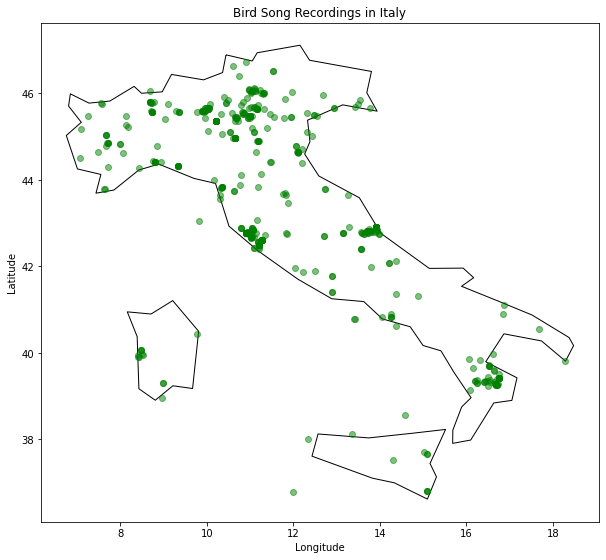

In [13]:
#create blank plot
fig, gax = plt.subplots(figsize=(10,10)) 

#add map of Italy
world.query("name == 'Italy'").plot(ax=gax, edgecolor='black',color='white') #specify country from name column

#add points for coordinates of individual bird song recordings
gdf.plot(ax=gax, color='green', alpha = 0.5)

#label map axes and add title
gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Bird Song Recordings in Italy')

plt.show() #display plot
